In [1]:
from evaluation_based_sampling import *
import time

asts = [load_ast_env(i) for i in range(1, 5)]

In [32]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from evaluation_based_sampling import *

%matplotlib inline

def plot_hist(vals, weights, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.hist(vals, bins=50, weights=weights)
    plt.show()
    
def plot_2_hists(vals, weights):
    plt.subplot(1, 2, 1)
    plt.hist(vals[:, 0], bins=50, weights=weights)
    plt.subplot(1, 2, 2)
    plt.hist(vals[:, 1], bins=50, weights=weights)
    plt.tight_layout()
    plt.show()


In [29]:
n_samples = int(1e4)
start_time = time.time()
data = likelihood_weighting(samples=n_samples, ast=asts[0])
print("--- %s seconds ---" % (time.time() - start_time))
mean = compute_expectation_IS(data, lambda r: r)
var = compute_expectation_IS(data, lambda r: np.array(r) ** 2 - mean ** 2)
print('Number of samples:', n_samples)
print('Mean:', mean)
print('Var:', var)

--- 1.535823106765747 seconds ---
Number of samples: 10000
Mean: 7.169663118839607
Var: 0.8100971736623269


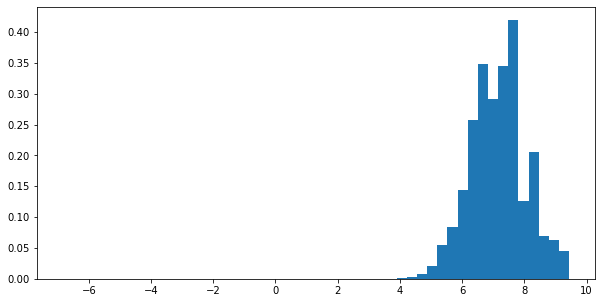

In [30]:
plot_hist(np.array(data[0]), np.exp(data[1]))

In [31]:
n_samples = int(1e4)
start_time = time.time()
start_time = time.time()
data = likelihood_weighting(samples=n_samples, ast=asts[1])
print("--- %s seconds ---" % (time.time() - start_time))
data = np.array(data[0]), np.array(data[1])
m1 = compute_expectation_IS((data[0][:, 0], data[1]), lambda r: r)
m2 = compute_expectation_IS((data[0][:, 1], data[1]), lambda r: r)
v00 = compute_expectation_IS((data[0][:, 0], data[1]), lambda r: np.array(r) ** 2 - m1 ** 2)
v11 = compute_expectation_IS((data[0][:, 1], data[1]), lambda r: np.array(r) ** 2 - m2 ** 2)
v01 = compute_expectation_IS(((data[0][:, 0] - m1) * (data[0][:, 1] - m2), data[1]), lambda r: r)
print('Number of samples:', n_samples)
print('Mean:', [m1, m2])
print('Cov:', np.array([[v00, v01], [v01, v11]]))

--- 6.89832067489624 seconds ---
Number of samples: 10000
Mean: [2.135884894664658, -0.5252902432557714]
Cov: [[ 0.05254188 -0.18625097]
 [-0.18625097  0.79977249]]


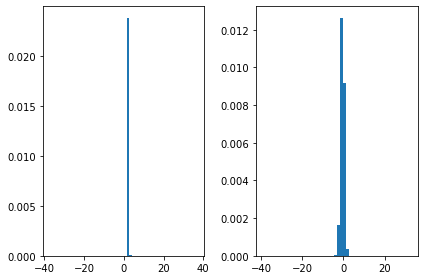

In [34]:
plot_2_hists(data[0], np.exp(data[1]))

In [35]:
n_samples = int(1e4)
start_time = time.time()
data = likelihood_weighting(samples=n_samples, ast=asts[2])
print("--- %s seconds ---" % (time.time() - start_time))
mean = compute_expectation_IS(data, lambda r: r)
var = compute_expectation_IS(data, lambda r: np.array(r) ** 2 - mean ** 2)
print('Number of samples:', n_samples)
print('Mean:', mean)
print('Var:', var)

--- 9.020255088806152 seconds ---
Number of samples: 10000
Mean: 0.12650261928060144
Var: 0.11049970659574865


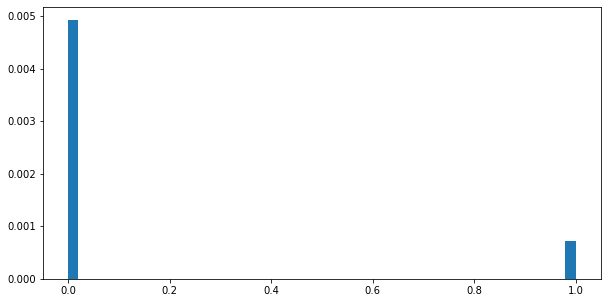

In [40]:
plot_hist(np.array(data[0]).astype(int), np.exp(data[1]))

In [41]:
n_samples = int(1e4)
start_time = time.time()
data = likelihood_weighting(samples=n_samples, ast=asts[3])
print("--- %s seconds ---" % (time.time() - start_time))
mean = compute_expectation_IS(data, lambda r: r)
var = compute_expectation_IS(data, lambda r: np.array(r) ** 2 - mean ** 2)
print('Number of samples:', n_samples)
print('Mean:', mean)
print('Var:', var)

--- 2.445106267929077 seconds ---
Number of samples: 10000
Mean: 0.32097588525820486
Var: 0.21795037407482126


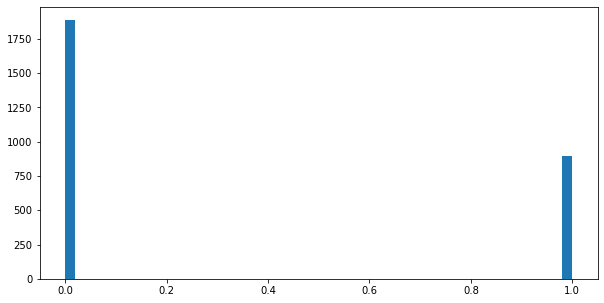

In [42]:
plot_hist(np.array(data[0]), np.exp(data[1]))